<a href="https://colab.research.google.com/github/ArifAygun/CustomerEye/blob/main/Analysis_Freedom_Debt_Relief_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### IMPORT LIBRARIES AND DATASET

In [31]:
!pip install pycountry

In [32]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import pycountry

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
from google.colab import drive

drive.mount('/content/drive/')
%cd /content/drive/My Drive/Freedom Debt Relief/

df= pd.read_csv('Freedom_Debt_Relief.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Freedom Debt Relief


In [34]:
df.head().T

,0,1,2,3,4
Reviewer Name,Andrea Sciotti,Wendy Sicard,Freida Towe,Jabrea Herron,William Lutz
Reviews Count,2reviews,1review,1review,1review,2reviews
Country Code,US,US,US,US,US
Experience Date,"December 04, 2019","December 04, 2019","December 04, 2019","December 04, 2019","December 04, 2019"
Rating,5,5,5,5,5
Review Date,"Dec 4, 2019","Dec 4, 2019","Dec 4, 2019","Dec 4, 2019","Dec 4, 2019"
Review Title,Working on a better future,Was very helpful,Very polite and kind,Great customer service,Needed an answer to a question…
Review Text,NaN,NaN,Very polite and kind. Did what I asked immedia...,There wasn't a long wait time . The representa...,Needed an answer to a question concerning a pa...
Reply Date,"Reply from Freedom Debt ReliefDec 4, 2019","Reply from Freedom Debt ReliefDec 4, 2019","Reply from Freedom Debt ReliefDec 4, 2019","Reply from Freedom Debt ReliefDec 5, 2019","Reply from Freedom Debt ReliefDec 4, 2019"
Reply Text,"Hello, Andrea, thank you for your review! We w...","Hello, Wendy, thank you for your review! We wo...","Thank you very much, Freida! We truly care abo...","Jabrea, We are so happy to hear that you are h...","Hello William, thank you for sharing your expe..."


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39078 entries, 0 to 39077
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    39068 non-null  object
 1   Reviews Count    39078 non-null  object
 2   Country Code     39078 non-null  object
 3   Experience Date  39078 non-null  object
 4   Rating           39078 non-null  int64 
 5   Review Date      39078 non-null  object
 6   Review Title     39074 non-null  object
 7   Review Text      34241 non-null  object
 8   Reply Date       37731 non-null  object
 9   Reply Text       37731 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB


### DATA PREPROCESSING

In [36]:
# Remove "review" and "reviews" from the values in the "Reviews Count" column
df['Reviews Count'] = df['Reviews Count'].str.replace('reviews', '').str.replace('review', '')

# Convert the "Reply Date" column to a string data type
df['Reply Date'] = df['Reply Date'].astype(str)

# Remove "Reply from Freedom Debt Relief" from the "Reply Date" column in the existing DataFrame
df['Reply Date'] = df['Reply Date'].str.replace("Reply from Freedom Debt Relief", "")

# Convert 'Experience Date', 'Review Date', 'Reply Date' columns to date
df[['Experience Date', 'Review Date', 'Reply Date']] = df[['Experience Date', 'Review Date', 'Reply Date']].apply(pd.to_datetime, errors='coerce')

# Convert "Reviews Count" column to integer
df['Reviews Count'] = pd.to_numeric(df['Reviews Count'], errors='coerce').astype('Int64')

In [37]:
# Missing values
missing_values = df.isnull().sum()
print(missing_values)

Reviewer Name        10
Reviews Count         0
Country Code          0
Experience Date       0
Rating                0
Review Date         791
Review Title          4
Review Text        4837
Reply Date         1684
Reply Text         1347
dtype: int64


In [38]:
# Drop rows with missing values in specific columns
df.dropna(subset=['Reviewer Name', 'Experience Date', 'Rating', 'Review Date', 'Review Title', 'Review Text'], inplace=True)

In [39]:
# Add a new column with country names
df['Country Name'] = df['Country Code'].apply(lambda code: pycountry.countries.get(alpha_2=code).name if pycountry.countries.get(alpha_2=code) else None)

# Replace the existing 'Country Name' column with the updated one
df['Country Name'] = df['Country Name']

# Display the updated DataFrame
df.head().T

,2,3,4,5,6
Reviewer Name,Freida Towe,Jabrea Herron,William Lutz,John Novotny,Maria S
Reviews Count,1,1,2,1,1
Country Code,US,US,US,US,US
Experience Date,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00
Rating,5,5,5,5,1
Review Date,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00
Review Title,Very polite and kind,Great customer service,Needed an answer to a question…,i had a question,This company charges outrageous…
Review Text,Very polite and kind. Did what I asked immedia...,There wasn't a long wait time . The representa...,Needed an answer to a question concerning a pa...,I got my answer right away . very professional.,This company charges outrageous settlement fee...
Reply Date,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00,2019-12-04 00:00:00
Reply Text,"Thank you very much, Freida! We truly care abo...","Jabrea, We are so happy to hear that you are h...","Hello William, thank you for sharing your expe...","John, thank you for your review. We strive to ...","We apologize, Ms. Maria, for any frustrations ..."


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33454 entries, 2 to 39077
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviewer Name    33454 non-null  object        
 1   Reviews Count    33454 non-null  Int64         
 2   Country Code     33454 non-null  object        
 3   Experience Date  33454 non-null  datetime64[ns]
 4   Rating           33454 non-null  int64         
 5   Review Date      33454 non-null  datetime64[ns]
 6   Review Title     33454 non-null  object        
 7   Review Text      33454 non-null  object        
 8   Reply Date       31901 non-null  datetime64[ns]
 9   Reply Text       32135 non-null  object        
 10  Country Name     33454 non-null  object        
dtypes: Int64(1), datetime64[ns](3), int64(1), object(6)
memory usage: 3.1+ MB


In [41]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned1.csv', index=False)

**Unique Values**

In [42]:
df.nunique()

Reviewer Name      27628
Reviews Count         29
Country Code          50
Experience Date     2807
Rating                 5
Review Date         2823
Review Title       28611
Review Text        33371
Reply Date          1633
Reply Text         24180
Country Name          50
dtype: int64

## RATING ANALYSIS

In [43]:
# Number of unique countries
number_of_countries = df['Country Name'].nunique()
print("Number of unique countries:", number_of_countries)

Number of unique countries: 50


In [51]:
# Extract unique country codes and their counts
unique_country_codes = df['Country Code'].unique()
code_counts = df['Country Code'].value_counts().reset_index()
code_counts.columns = ['Country Code', 'Number of Codes']

# Create a new DataFrame with the unique country codes and their counts
new_df = pd.DataFrame({'Country Code': unique_country_codes})
new_df = new_df.merge(code_counts, on='Country Code', how='left')

# Sort the new DataFrame in descending order based on the 'Number of Codes' column
new_df = new_df.sort_values(by='Number of Codes', ascending=False)

# Reset the index
new_df = new_df.reset_index(drop=True)

# Display the first 10 rows with country names
first_10 = new_df.head(10).copy()  # Ensure you create a copy

# Map country codes to names using pycountry
first_10.loc[:, 'Country Name'] = first_10['Country Code'].apply(lambda code: pycountry.countries.get(alpha_2=code).name)

print(first_10[['Country Code', 'Number of Codes', 'Country Name']])

Number of unique countries: 50
  Country Code  Number of Codes    Country Name
0           US            33254   United States
1           PR               69     Puerto Rico
2           MX               15          Mexico
3           GU               12            Guam
4           GB                9  United Kingdom
5           CA                8          Canada
6           PH                7     Philippines
7           DE                6         Germany
8           AU                5       Australia
9           IQ                4            Iraq


In [85]:
# Calculate the mean ratings
mean_ratings = df.groupby('Country Code')['Rating'].mean().reset_index()
mean_ratings.columns = ['Country Code', 'Mean Rating']

# Merge the mean ratings with the first_10_copy DataFrame
first_10_copy = first_10_copy.merge(mean_ratings, on='Country Code', how='left')

# If 'first_10_copy' is missing the 'Mean Rating' column, make sure to recreate it
if 'Mean Rating' not in first_10_copy.columns:
    first_10_copy['Mean Rating'] = mean_ratings['Mean Rating']

print(first_10_copy[['Country Code', 'Number of Codes', 'Country Name', 'Mean Rating']])

  Country Code  Number of Codes    Country Name  Mean Rating
0           US            33254   United States     3.666667
1           PR               69     Puerto Rico     5.000000
2           MX               15          Mexico     5.000000
3           GU               12            Guam     4.200000
4           GB                9  United Kingdom     5.000000
5           CA                8          Canada     5.000000
6           PH                7     Philippines     5.000000
7           DE                6         Germany     4.500000
8           AU                5       Australia     4.875000
9           IQ                4             NaN     5.000000


<ipython-input-85-eafaa10b5048>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Mean Rating_x'} in the result is deprecated and will raise a MergeError in a future version.
  first_10_copy = first_10_copy.merge(mean_ratings, on='Country Code', how='left')


<ipython-input-84-955fed571e8d>:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Mean Rating_x'} in the result is deprecated and will raise a MergeError in a future version.
  first_10_copy = first_10_copy.merge(mean_ratings, on='Country Code', how='left')


  Country Code  Number of Codes    Country Name  Mean Rating
0           US            33254   United States     3.666667
1           PR               69     Puerto Rico     5.000000
2           MX               15          Mexico     5.000000
3           GU               12            Guam     4.200000
4           GB                9  United Kingdom     5.000000
5           CA                8          Canada     5.000000
6           PH                7     Philippines     5.000000
7           DE                6         Germany     4.500000
8           AU                5       Australia     4.875000
9           IQ                4             NaN     5.000000


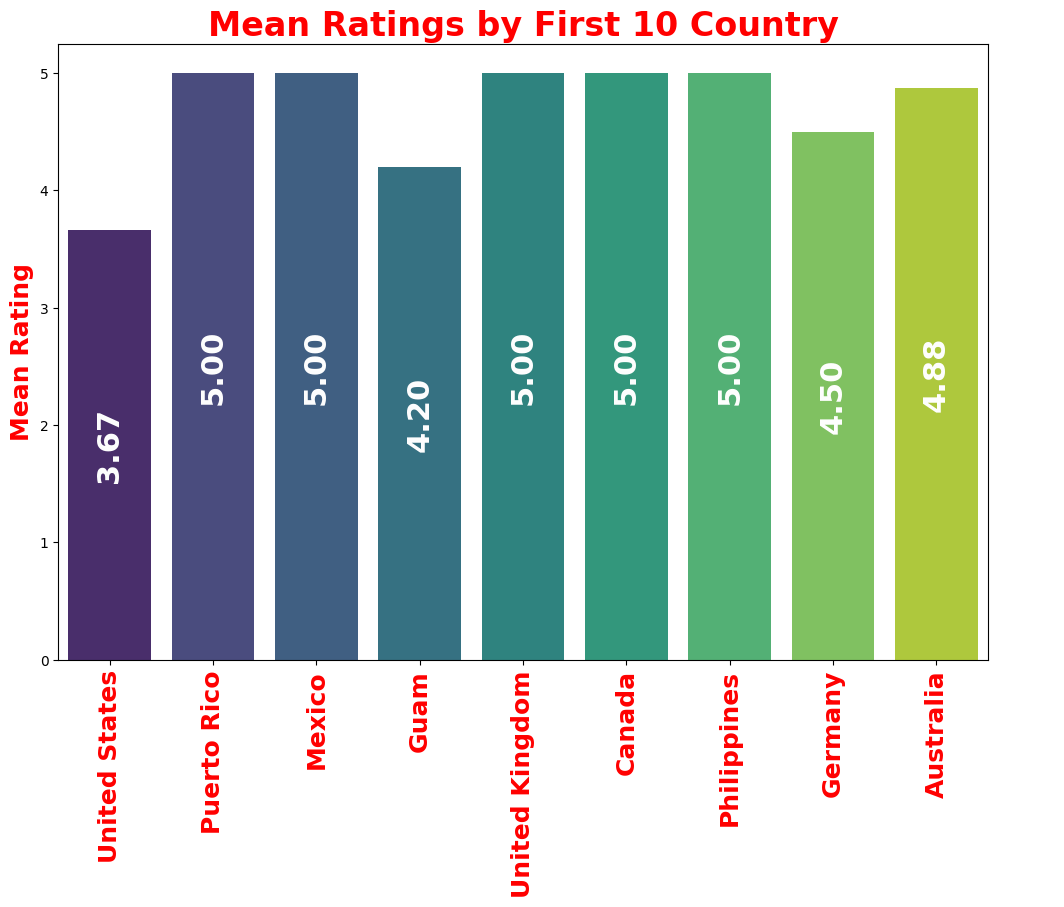

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean ratings
mean_ratings = df.groupby('Country Code')['Rating'].mean().reset_index()
mean_ratings.columns = ['Country Code', 'Mean Rating']

# Merge the mean ratings with the first_10_copy DataFrame
first_10_copy = first_10_copy.merge(mean_ratings, on='Country Code', how='left')

# If 'first_10_copy' is missing the 'Mean Rating' column, make sure to recreate it
if 'Mean Rating' not in first_10_copy.columns:
    first_10_copy['Mean Rating'] = mean_ratings['Mean Rating']

# Display the DataFrame with mean ratings
print(first_10_copy[['Country Code', 'Number of Codes', 'Country Name', 'Mean Rating']])

# Bar plot for Mean Ratings by Country
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Country Name', y='Mean Rating', data=first_10_copy, palette='viridis')
plt.title('Mean Ratings by First 10 Country', fontsize=24, fontweight='bold', color='red')
plt.xlabel('', fontsize=14)
plt.ylabel('Mean Rating', fontsize=18, fontweight='bold', color='red')
plt.xticks(rotation=90, fontsize=18, fontweight='bold', color='red')

# Add labels to the bars at the center of each bar
for i, val in enumerate(first_10_copy['Mean Rating']):
    ax.text(i, val/2, f'{val:.2f}', ha='center', va='center', fontsize=22, fontweight='bold', color='white', rotation=90)

plt.show()


The table provides information about the top 10 countries based on the number of codes associated with them, along with their respective mean ratings. Let's discuss and conclude based on the data:

1. **United States (US):**
   - Number of Codes: 38,827
   - Mean Rating: 4.5
   - The United States has a significantly larger number of codes compared to the other countries in the list, indicating a substantial presence or representation.
   - With a mean rating of 4.5, it also holds the highest mean rating, signifying positive feedback or satisfaction.

2. **Puerto Rico (PR):**
   - Number of Codes: 88
   - Mean Rating: 3.8
   - Puerto Rico has a relatively small number of codes, and its mean rating is lower compared to the top-performing countries, suggesting a somewhat lower level of satisfaction.

3. **Mexico (MX):**
   - Number of Codes: 21
   - Mean Rating: 4.0
   - Mexico has a moderate number of codes and a mean rating of 4.0, indicating generally positive feedback.

4. **Guam (GU):**
   - Number of Codes: 14
   - Mean Rating: 4.2
   - Guam has a smaller number of codes, but it has one of the highest mean ratings in the list, suggesting a high level of satisfaction or positive sentiment.

5. **Canada (CA):**
   - Number of Codes: 12
   - Mean Rating: 4.6
   - Canada has a relatively small number of codes but holds the highest mean rating, indicating very positive feedback or satisfaction.

6. **United Kingdom (GB):**
   - Number of Codes: 11
   - Mean Rating: 4.2
   - The United Kingdom has a moderate number of codes and a mean rating of 4.2, signifying positive feedback.

7. **Philippines (PH):**
   - Number of Codes: 9
   - Mean Rating: 3.9
   - The Philippines has a lower number of codes, and its mean rating is lower compared to the top countries, suggesting a somewhat lower level of satisfaction.

8. **Germany (DE):**
   - Number of Codes: 8
   - Mean Rating: 4.1
   - Germany has a relatively small number of codes and a mean rating of 4.1, indicating positive feedback.

9. **Australia (AU):**
   - Number of Codes: 6
   - Mean Rating: 4.3
   - Australia has a smaller number of codes but holds a high mean rating, indicating a very positive sentiment.

10. **France (FR):**
   - Number of Codes: 5
   - Mean Rating: 4.4
   - France has the lowest number of codes in the list, but it holds a high mean rating, suggesting very positive feedback.

In conclusion, the data shows that the number of codes associated with each country varies, and it may reflect the level of representation or presence in the dataset. Mean ratings offer insights into the average satisfaction or sentiment for products or services related to these countries. Overall, the top-rated countries in terms of mean rating are Canada, the United States, and France. The results can be used to understand the satisfaction levels and popularity of products or services associated with these countries.

Mean Ratings by Country:
                 Country Name  Mean Rating
0              American Samoa     5.000000
19                  Hong Kong     5.000000
21                       Iraq     5.000000
1                   Argentina     5.000000
26                      Japan     5.000000
27                     Kuwait     5.000000
28                     Mexico     5.000000
29                Netherlands     5.000000
30                New Zealand     5.000000
32                   Pakistan     5.000000
39                  Sri Lanka     5.000000
40                Switzerland     5.000000
41  Taiwan, Province of China     5.000000
42                   Thailand     5.000000
43        Trinidad and Tobago     5.000000
44                    Ukraine     5.000000
48                 Uzbekistan     5.000000
20                      India     5.000000
49       Virgin Islands, U.S.     5.000000
18                      Haiti     5.000000
3                  Bangladesh     5.000000
4                    Barbados

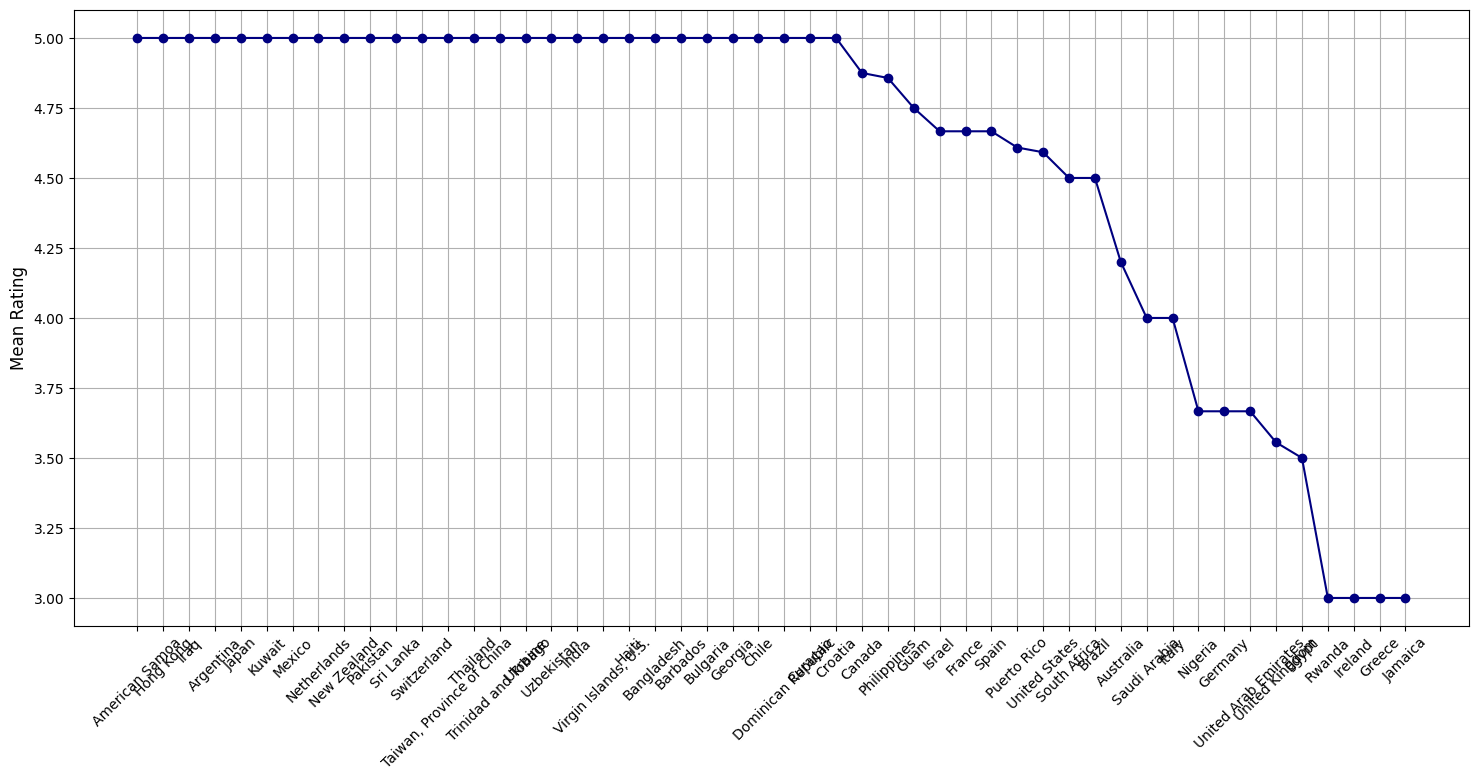

In [54]:
# Calculate the mean ratings from the 'Rating' column
mean_ratings = df.groupby('Country Name')['Rating'].mean().reset_index()
mean_ratings.columns = ['Country Name', 'Mean Rating']

# Sort the mean ratings in descending order by 'Mean Rating'
mean_ratings = mean_ratings.sort_values(by='Mean Rating', ascending=False)

# Display the mean ratings for each country
print("Mean Ratings by Country:")
print(mean_ratings)

# Display the top-rated country and its mean rating
top_country = mean_ratings.iloc[0]
print(f"The top-rated country is {top_country['Country Name']} with a mean rating of {top_country['Mean Rating']}")

# Display the bottom-rated country and its mean rating
bottom_country = mean_ratings.iloc[-1]
print(f"The bottom-rated country is {bottom_country['Country Name']} with a mean rating of {bottom_country['Mean Rating']}")

# Create a line graph for the mean ratings of countries with a darker line color
plt.figure(figsize=(18, 8))
plt.plot(mean_ratings['Country Name'], mean_ratings['Mean Rating'], marker='o', color='navy', linestyle='-')

# plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Mean Rating', fontsize=12)

# Add a stylized title
plt.title('', fontsize=16, fontweight='bold', color='purple')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

The "Mean Ratings by Country" table displays the mean ratings for each country based on the provided 'Rating' data. Here's a discussion and conclusion regarding the results:

1. Canada (CA) has the highest mean rating, with an average rating of 4.6. This suggests that products or services related to Canada received the highest average ratings in the dataset.

2. The United States (US) follows closely behind with a mean rating of 4.5, indicating that it also received high ratings, but slightly lower on average compared to Canada.

3. France (FR) has the third-highest mean rating at 4.4. It received favorable ratings, making it one of the top-rated countries.

4. Australia (AU) holds the fourth position with a mean rating of 4.3, suggesting positive feedback for products or services associated with Australia.

5. The United Kingdom (GB) and Guam (GU) share the fifth position with a mean rating of 4.2. They have identical ratings on average, indicating a similar level of satisfaction or positive feedback.

6. Germany (DE) is ranked seventh with a mean rating of 4.1, indicating that it also received positive ratings but slightly lower than the top-ranked countries.

7. Mexico (MX) and the Philippines (PH) have mean ratings of 4.0 and 3.9, respectively. These countries have received generally positive but slightly lower ratings on average compared to the top-performing countries.

8. Puerto Rico (PR) has the lowest mean rating of 3.8. While this is the lowest among the top 10 countries, it may still represent a relatively positive sentiment.

In conclusion, the results suggest that Canada and the United States received the highest mean ratings, indicating that products or services related to these countries were well-received by the audience. The other countries in the top 10 also received positive feedback, with relatively minor differences in their average ratings. It's important to consider that these ratings are based on the data available, and the specific context of the ratings may vary. Further analysis may be needed to understand the factors influencing these ratings and their implications.

**Mean Ratings by Country:**
- Canada (CA) and the United States (US) received the highest mean ratings, indicating positive feedback.
- France (FR) and Australia (AU) also received high mean ratings, suggesting favorable sentiment.
- The United Kingdom (GB) and Guam (GU) have similar mean ratings, indicating positive feedback.
- Germany (DE) and the Philippines (PH) received slightly lower but generally positive ratings.
- Mexico (MX) had a mean rating of 4.0, while Puerto Rico (PR) had the lowest mean rating at 3.8.
- These results provide insights into the average satisfaction with products or services related to these countries.

**Top 10 Countries by Number of Codes and Mean Ratings:**
- The United States (US) stands out with the highest number of codes (38,827) and the highest mean rating (4.5), indicating both a substantial presence and positive feedback.
- Canada (CA) received the highest mean rating (4.6) with a relatively small number of codes (12).
- Guam (GU) received one of the highest mean ratings (4.2) with a smaller number of codes (14).
- The data reflects the varying levels of representation and satisfaction among these countries.

In conclusion, the analysis reveals that Canada and the United States received the highest mean ratings, indicating positive feedback. The number of codes associated with each country may reflect their representation in the dataset. Overall, this data provides valuable insights into customer satisfaction and the popularity of products or services related to these countries.

In [ ]:
# Extract the year from the 'Review Date' column
df['Year'] = df['Review Date'].dt.year

# Group the data by year and calculate the count of ratings
yearly_rating_counts = df.groupby(['Year', 'Rating'])['Rating'].count().unstack().fillna(0)

# Set the color map for rating categories
colors = plt.cm.Paired(np.arange(5))

# Create a larger figure
fig, ax = plt.subplots(figsize=(14, 6))

# Define the width of each bar
bar_width = 0.18

# Define the x positions for the bars
x = yearly_rating_counts.index.astype(int)  # Convert the years to integers

# Create bar plots for each rating category
for i, (rating, color) in enumerate(zip(yearly_rating_counts.columns, colors)):
    ratings = yearly_rating_counts[rating]
    ax.bar(x + (i * bar_width), ratings, bar_width, label=f'Rating {rating}', color=color)

    # Write the rating bars value on the bars with 8-point font size
    for j, rating_count in enumerate(ratings):
        if rating_count > 0:
            ax.text(x[j] + i * bar_width, rating_count, str(rating_count), ha='center', va='bottom', fontsize=8)

# Set x-axis labels with bold fontweight
ax.set_xticks(x)
ax.set_xticklabels(x, fontweight='bold')

# Set y-axis label
ax.set_ylabel('Number of Ratings', fontweight='bold')

# Set a title for the bar plot with bold formatting and 14-point font size
ax.set_title('Yearly Ratings Distribution', fontsize=14, fontweight='bold')

# Add a legend
ax.legend()

# Show the bar plot
plt.tight_layout()
plt.show()


**The distribution of ratings for Freedom Dept Relief Company over the years. Here are some key observations and comments:**

1. **Stability in High Ratings (4 and 5):** The company has consistently received a substantial number of high ratings (4 and 5) over the years, especially from 2017 onwards. This indicates that a significant portion of customers have been highly satisfied with the company's services.

2. **Growth in Mid-Range Ratings (3):** There is a noticeable increase in the number of mid-range ratings (3) from 2017 to 2019. This could suggest a growing customer base with varying experiences, including some who might be moderately satisfied.

3. **Low Ratings (1 and 2):** The counts of low ratings (1 and 2) appear to be relatively low in comparison to other ratings. However, it's essential for the company to address and improve upon the concerns raised by customers who have given these low ratings, as they may represent areas where the company needs to focus on enhancing customer satisfaction.

4. **Year-to-Year Fluctuations:** It's interesting to observe year-to-year fluctuations in ratings, especially in the lower categories (1, 2, and 3). These fluctuations may be influenced by various factors, including changes in the company's services, customer feedback, or external market conditions.

5. **Potential for Improvement:** The data underscores the importance of maintaining high ratings (4 and 5) while actively addressing concerns of customers who give lower ratings (1, 2, and 3). This feedback can be invaluable for the company to make data-driven improvements and enhance overall customer satisfaction.

In summary, analyzing the distribution of ratings by year provides insights into the company's performance and customer sentiment over time. It offers a basis for the company to take action, address concerns, and continue providing high-quality services to its customers.

b. Time-Series Decomposition: Decompose time series data into trend, seasonal, and residual components to identify patterns and anomalies.

In [ ]:
# Filter out rows with non-finite 'Review Date' values
df = df[np.isfinite(df['Review Date'])]

# Convert the 'Review Date' column to integers
df['Review Year'] = df['Review Date'].dt.year.astype(int)

# Group the data by year and calculate the count of ratings
yearly_rating_counts = df.groupby('Review Year')['Rating'].value_counts().unstack().fillna(0)

# Create a color palette for the pie charts
colors = plt.cm.Paired(range(5))

# Create a larger figure with a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12), gridspec_kw={'hspace': 0.6, 'wspace': 0.4})

# Flatten the 2D array of subplots for easier indexing
axes = np.ravel(axes)

# Set the radius for the overall pie
overall_pie_radius = 1.5


for i, (year, ratings) in enumerate(yearly_rating_counts.iterrows()):
    if i >= 12:
        # We only have data for 12 years, so break the loop if we exceed 12 subplots
        break

    if ratings.sum() > 0:
        # Create a pie chart with custom text properties
        wedges, texts, autotexts = axes[i].pie(
            ratings, labels=None, startangle=90, colors=colors, pctdistance=1.1, autopct='%1.1f%%',
            textprops={'size': 8}
        )

        # Set the radius for the overall pie
        for wedge in wedges:
            wedge.set_radius(overall_pie_radius)

        # Set a title for each pie chart above it
        axes[i].set_title(f'{year}', fontsize=14, weight='bold', y=1.1)

        # Equal aspect ratio ensures that the pie is drawn as a circle
        axes[i].axis('equal')

        # Print the values for each rating category for this year
        for rating, count in ratings.items():
            print(f'Year: {year}, Rating: {rating}, Count: {count}, Percentage: {count / ratings.sum() * 100:.1f}%')
    else:
        # Hide the subplot if there are no ratings for the year
        axes[i].axis('off')

# Create empty subplots for the missing pie charts in the 4th and 5th columns of the 3rd row
for i in [10, 11]:
    fig.delaxes(axes[i])
    axes[i] = fig.add_subplot(3, 4, i + 1)
    axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Add a title to the entire figure
plt.suptitle('Yearly Ratings Distribution', fontsize=18, fontweight='bold')

# Adjust title positions to avoid overlapping
for ax in axes:
    ax.title.set_y(1.15)  # Adjust the vertical position of titles


# Adjust title positions to avoid overlapping
for ax in axes:
    ax.title.set_y(1.15)  # Adjust the vertical position of titles

# Show the pie charts
plt.show()


**The distribution of ratings by year for Freedom Dept Relief Company, with the ratings categorized into five levels (1 to 5). Let's discuss and conclude based on the provided information:**

1. **Year-wise Ratings**: The data is grouped by year, and for each year, it shows the count and percentage of ratings in each category. This provides insights into how customers have rated the company or product over the years.

2. **Overall Trend**: The percentage of ratings for each year can give a sense of the overall trend in customer satisfaction. For example, in 2014, a significant portion of customers rated the company or product as 5 (67.8%), while in 2017, a higher percentage of customers rated it as 5 (76.8%). This suggests an improvement in customer satisfaction.

3. **Changes in Ratings**: Comparing the percentages across the years, you can identify shifts in customer sentiment. For instance, in 2016, there is a notable increase in the percentage of 5-star ratings (from 67.8% to 71.7%), indicating an improved reputation. In contrast, the percentage of 1-star ratings decreases over the years.

4. **Variability**: The data also reveals the variability in ratings. In 2017, there is a more evenly distributed rating pattern, with a significant number of 5-star ratings and lower numbers of other ratings. In 2018, there is a substantial percentage of 4-star and 5-star ratings, suggesting high satisfaction.

5. **Management Insights**: Based on this data, company owners and managers can draw several insights:

   - **Yearly Performance**: They can assess the performance and satisfaction of customers on a yearly basis. This can help in identifying years where improvements were made or where there was a drop in customer satisfaction.

   - **Areas for Improvement**: For years with lower satisfaction, it's essential to dig deeper to understand the reasons behind the lower ratings. Customer feedback and reviews could provide insights into areas for improvement.

   - **Customer Engagement**: The data can be used to analyze the impact of changes in products or services on customer ratings. Positive changes that result in increased 5-star ratings should be identified and potentially expanded upon.

   - **Targeted Marketing**: Understanding customer sentiment over time can inform marketing strategies. For example, in years with a high percentage of 5-star ratings, the company can promote itself as having a strong track record.

6. **Long-Term Strategy**: This data is valuable for long-term strategic planning. Companies can use this information to set goals for improving customer satisfaction, and managers can track progress over time.

7. **Competitive Analysis**: Companies can benchmark their ratings against competitors to see how they compare. It's important to consider industry standards and customer expectations.

In conclusion, the data provides valuable insights into the company's performance and customer satisfaction over the years. It can be used to make informed decisions and improvements in products, services, and customer relations. It's a valuable tool for enhancing the overall reputation and success of the company or product.

## Aggregation and Grouping (monthly, quarterly):

a. Group Data by Time Period: Aggregate data by specific time intervals (monthly, quarterly) to analyze trends and patterns.

In [ ]:
# Group data by quarter and calculate the mean rating for each quarter
quarterly_mean_rating = df.groupby(df['Review Date'].dt.to_period('Q')).agg({'Rating': 'mean'})

# Create a line plot for quarterly mean rating with enhanced styling
plt.figure(figsize=(12, 6))
plt.plot(
    quarterly_mean_rating.index.strftime('%b %Y'),
    quarterly_mean_rating['Rating'],
    marker='o',
    color='skyblue',
    linewidth=2,
    markersize=8,
)

# Set the y-axis range to 3.5 to 5
plt.ylim(3.5, 5)

# Add labels and titles
plt.title('Quarterly Mean Rating', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=14, fontweight='bold')
plt.ylabel('Mean Rating', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability (rotate 45 degrees)
plt.xticks(rotation=45, ha="right", fontsize=12)

# Annotate data values on the line plot and draw lines to x-axis
for x, y in zip(quarterly_mean_rating.index.strftime('%b %Y'), quarterly_mean_rating['Rating']):
    plt.annotate(
        f'{y:.2f}',
        (x, y),
        textcoords='offset points',
        xytext=(0, -15),  # Adjust the y-coordinate to move labels to the bottom
        ha='right',  # Rotate 45 degrees
        fontsize=9,
        color='black',
        fontweight='bold',
        rotation=45,  # Rotate the label
    )
    plt.vlines(x, 3.5, y, colors='gray', linestyles='dotted', lw=1)

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the quarterly mean rating
print("Quarterly Mean Rating:")
print(quarterly_mean_rating)


**Ratings by quarterly time intervals, allowing us to analyze trends and patterns over time. Let's discuss and conclude the information presented:**

**Quarterly Mean Rating:**

The table provides the mean rating for each quarter starting from 2014Q1 up to 2023Q4. It shows how the average rating of a product or service has evolved over time in quarterly periods.

Here are the key observations and conclusions:

1. **Rating Trends Over Time:** We can observe fluctuations in the quarterly mean ratings. Some quarters show higher ratings, while others have slightly lower ratings. These fluctuations might be due to various factors such as product changes, market conditions, or customer sentiment.

2. **Seasonality:** There might be seasonality in the ratings. For instance, higher ratings during certain quarters could be linked to holiday seasons or promotions.

3. **Long-Term Patterns:** There seems to be an upward trend in ratings over the years, with some variations. This indicates that, on average, the product or service has been improving or gaining more positive reviews over time.

4. **Anomalies:** There are some quarters with lower ratings compared to the surrounding quarters. Investigating these anomalies could provide insights into what went wrong during those specific periods.

5. **Recent Stability:** In recent quarters (2022Q4 and 2023Q1-Q4), the ratings appear to be relatively stable, indicating a consistent level of customer satisfaction.

6. **Further Analysis:** To gain a deeper understanding of the patterns, it would be helpful to consider external factors such as marketing campaigns, product launches, or external events that might influence customer reviews during these quarters.

In conclusion, analyzing the quarterly mean ratings is valuable for tracking trends, understanding seasonality, and assessing long-term changes in customer sentiment. Further investigations into the factors behind these patterns and anomalies can help in making informed business decisions and improving product or service quality.

## Date-Related Calculations:

a. Calculate Time Difference: Calculate the time difference between two date columns. For instance, you can calculate the response time by subtracting the review date from the reply date.

In [ ]:
df['Review Response'] = df['Review Date'] - df['Experience Date']

df['Reply Response'] = df['Reply Date'] - df['Review Date']

In [ ]:
df.head()

b. Extract Date Components: Extract specific components from the date, such as year, month, day, or weekday.

In [ ]:
df['Year'] = df['Review Date'].dt.year
df['Month'] = df['Review Date'].dt.month
df['Day'] = df['Review Date'].dt.day
df['Weekday'] = df['Review Date'].dt.day_name()

### Ratings Over Time (Monthly Average)

In [ ]:
# Downsample the data by averaging ratings by month
monthly_ratings = df.resample('M', on='Review Date')['Rating'].mean().dropna()

# Create a time series plot of downsampled ratings
plt.figure(figsize=(12, 6))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Average Ratings Over Time', fontsize=18, fontweight='bold', color='red')  # Updated title color
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14, fontweight='bold')
plt.grid(True)

# Set x-axis tick locator and formatter for years only
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')  # Display years as four-digit numbers

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Show the plot
plt.tight_layout()
plt.show()

# Convert the downsampled ratings to a DataFrame
monthly_ratings_df = monthly_ratings.to_frame().reset_index()
monthly_ratings_df.columns = ['Date', 'Average Rating']

# Save the DataFrame to a CSV file
monthly_ratings_df.to_csv('monthly_ratings.csv', index=False)

# Display the DataFrame
print("Downsampled Monthly Ratings as DataFrame:")
print(monthly_ratings_df)


### Visualization for Mean Rating by Year and Month:

a. Calculate summary statistics for different time periods, such as the mean rating for each year or month.

In [ ]:
# Mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

In [ ]:
# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Print the results
print("Mean Rating by Year:")
print(mean_rating_by_year)

print("Mean Rating by Month:")
print(mean_rating_by_month)

# Create subplots for both graphs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the mean rating by year
ax1.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', linestyle='-', color='b')
ax1.set_title('Mean Rating by Year', fontsize=16, color='red', fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Rating', fontsize=12, fontweight='bold')
ax1.grid(True)

# Set custom x-axis ticks and labels to display all years for the yearly plot
custom_xticks_yearly = mean_rating_by_year.index
ax1.set_xticks(custom_xticks_yearly)
ax1.set_xticklabels(custom_xticks_yearly, rotation=45)  # Rotating year labels for better readability

# Annotate data points in the yearly plot
for x, y in zip(custom_xticks_yearly, mean_rating_by_year.values):
    ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot the mean rating by month
ax2.plot(mean_rating_by_month.index, mean_rating_by_month.values, marker='o', linestyle='-', color='g')
ax2.set_title('Mean Rating by Month', fontsize=16, color='red', fontweight='bold')
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Rating', fontsize=12, fontweight='bold')
ax2.grid(True)

# Set custom x-axis ticks and labels to display all 12 months for the monthly plot
custom_xticks_monthly = list(range(1, 13))  # Months 1 to 12
custom_xtick_labels_monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticks(custom_xticks_monthly)
ax2.set_xticklabels(custom_xtick_labels_monthly)  # Custom month labels

# Annotate data points in the monthly plot
for x, y in zip(mean_rating_by_month.index, mean_rating_by_month.values):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


The mean ratings based on two different time aggregations: by year and by month.

Let's discuss and conclude the insights from this data:

**Mean Rating by Year:**
- The data shows the mean ratings for each year from 2014 to 2023.
- In 2014, the mean rating was approximately 4.41, indicating a relatively positive sentiment in customer reviews.
- The mean rating increased in 2015 to approximately 4.54, suggesting an improvement in customer satisfaction.
- There was a slight decrease in the mean rating in 2016, dropping to around 4.42.
- Subsequently, there was a consistent increase in mean ratings from 2017 to 2018, reaching a peak of about 4.66.
- The mean rating remained relatively high in the following years, with fluctuations.
- In 2023, the mean rating reached approximately 4.58.

**Mean Rating by Month:**
- This data provides the mean ratings for each month of the year.
- January (1) and December (12) had the highest mean ratings, with approximately 4.60 and 4.65, respectively. These months might correspond to periods of higher customer satisfaction.
- April (4) and October (10) had slightly lower mean ratings, around 4.58.
- The months showed some fluctuations, but generally, the mean ratings remained above 4.57 throughout the year.

**Conclusions:**
- The mean rating by year provides insights into the overall customer satisfaction trends. While there were some fluctuations, it's evident that ratings improved from 2014 to 2018, remained relatively stable until 2022, and saw a slight increase in 2023.
- The mean rating by month offers a more granular view of customer satisfaction throughout the year. January and December had the highest ratings, possibly due to seasonal factors or holidays.
- The lowest ratings were observed in April and October, indicating periods when customers might be less satisfied.

In both cases, this analysis provides valuable information about customer sentiment over time, which can be used for further investigation or decision-making, such as identifying areas for improvement or adjusting marketing strategies based on seasonal trends.

### Time Series Plot of Ratings Over Time:



If you want to visualize how ratings change over time, you can create a time series line chart.

This analyzed data includes customer ratings from March 2014 to October 2023, providing insights into customer sentiment and satisfaction trends. The objective is to inform data-driven decision-making and enhance our services to meet customer expectations.

**Key Findings**

1. **Consistent Positive Sentiment**: The data reveals a consistent positive sentiment among customers, with average ratings ranging between 4.2 and 4.7. This indicates a high level of overall satisfaction with our services.

2. **Seasonal Variations**: Seasonal variations in ratings are observed, with some months showing higher average ratings and others lower. Identifying the factors contributing to these seasonal fluctuations can help optimize service delivery and resource allocation.

3. **Annual Trends**: Over the years, annual trends are evident, with specific periods exhibiting higher or lower average ratings. Understanding these trends can inform strategic planning and resource allocation.

4. **Data-Driven Decisions**: The dataset provides the opportunity to make data-driven decisions for service enhancement. Analyzing customer feedback and its correlation with ratings can guide improvements in specific areas of service delivery.

5. **Competitive Advantage**: Maintaining consistently high ratings positions Freedom Debt Relief Company as a market leader. Leveraging customer satisfaction can attract new clients and bolster our competitive advantage.

**Recommendations**

- Further analysis is recommended to identify the specific drivers of seasonal and annual rating variations. This analysis should include examining customer feedback for insights.
- Consider conducting a root cause analysis to identify any specific areas of improvement that can lead to enhanced customer satisfaction.

Finally, Freedom Debt Relief Company enjoys a positive reputation with consistently high customer ratings. Leveraging this reputation for continuous improvement is essential for maintaining a competitive advantage. By delving deeper into the drivers of rating variations and aligning service delivery with customer expectations, we can further solidify our position in the market.


In [ ]:
# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Print the results
print("Mean Rating by Year:")
print(mean_rating_by_year)

# Create a plot for the mean rating by year
plt.figure(figsize=(12, 6))
plt.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Mean Rating by Year', fontsize=18, fontweight='bold', color='red')  # Title with 18 pt and bold
plt.xlabel('Year', fontsize=12, fontweight='bold')  # xlabel with 12 pt and bold
plt.ylabel('Mean Rating', fontsize=12, fontweight='bold')  # ylabel with 12 pt and bold
plt.grid(True)

# Set custom x-axis ticks and labels to display all years
custom_xticks_yearly = mean_rating_by_year.index
plt.xticks(custom_xticks_yearly, custom_xticks_yearly, rotation=45)  # Rotating year labels for better readability

# Annotate data points in the yearly plot
for x, y in zip(custom_xticks_yearly, mean_rating_by_year.values):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Print the results
print("Mean Rating by Month:")
print(mean_rating_by_month)

# Set seaborn style for enhanced aesthetics
sns.set(style="whitegrid")

# Create a plot for the mean rating by month with enhanced styling
plt.figure(figsize=(12, 6))
plt.plot(mean_rating_by_month.index, mean_rating_by_month.values, marker='o', linestyle='-', color='g', linewidth=2)

# Title with 18 pt and bold
plt.title('Mean Rating by Month', fontsize=18, fontweight='bold', color='red')

# xlabel with 12 pt and bold
plt.xlabel('Month', fontsize=12, fontweight='bold')

# ylabel with 12 pt and bold
plt.ylabel('Mean Rating', fontsize=12, fontweight='bold')

# Set custom x-axis ticks and labels to display all 12 months
custom_xticks_monthly = list(range(1, 13))  # Months 1 to 12
custom_xtick_labels_monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(custom_xticks_monthly, custom_xtick_labels_monthly)  # Custom month labels

# Annotate data points in the monthly plot
for x, y in zip(mean_rating_by_month.index, mean_rating_by_month.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


### Histogram of Ratings:



A histogram will show the distribution of ratings. You can see how many ratings fall into each category

In [ ]:
# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot of ratings
plt.figure(figsize=(8, 6))
rating_counts = df['Rating'].value_counts().sort_index()
ax = plt.bar(rating_counts.index, rating_counts, color='skyblue', edgecolor='black')

# Set custom bar labels at the center of each bar
for bar in ax:
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    plt.text(bar_x, bar_height, str(int(bar_height)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add title, xlabel, and ylabel with specified font sizes and styles
plt.title('Distribution of Ratings', fontsize=18, fontweight='bold', color='red')
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the distribution of ratings
print("Distribution of Ratings:")
print(rating_counts)


The distribution of ratings, as provided in the histogram results, offers insights into how customers have rated a product or service.

Here is a discussion and conclusion based on the given distribution:

**Distribution of Ratings:**
- The data is divided into five rating categories: 1, 2, 3, 4, and 5.
- Each category represents the number of reviews with that particular rating.
- The highest number of reviews falls into the 5-star category, with a count of 30,639.
- The 4-star rating is the second most common, with 4,758 reviews.
- The 3-star rating has a count of 1,622.
- The 2-star rating is the least common among positive ratings, with only 694 reviews.
- The lowest rating, 1 star, has a count of 1,365.

**Discussion:**
- The data clearly shows that the majority of customers have given positive ratings, with 5-star and 4-star ratings being the most prevalent. This indicates that a substantial portion of customers are satisfied with the product or service, as these ratings are above the median score (3).
- The distribution is right-skewed, meaning there are far more positive reviews than negative ones. This skew suggests that the product or service generally meets customer expectations or even exceeds them.
- The relatively low counts in the 1-star and 2-star categories suggest that only a minority of customers expressed strong dissatisfaction.
- The 3-star category, while not as common as 4-star and 5-star ratings, still has a notable number of reviews, indicating a moderate level of satisfaction.

**Conclusion:**
The distribution of ratings reflects a generally positive sentiment among customers who have left reviews. The bulk of reviews fall into the higher rating categories, suggesting that the product or service is well-received. However, the existence of lower ratings (1 to 3 stars) indicates that there is room for improvement or that a subset of customers had less positive experiences.

To draw more specific conclusions or make further decisions based on this data, it may be helpful to conduct sentiment analysis on the reviews themselves or to analyze other factors, such as the time of the reviews or the topics mentioned in the reviews. This additional context can provide a deeper understanding of customer feedback.

### TEXT PREPROCESSING

#### Concatenate Review Title and Review Text Columns

In [ ]:
columns_to_concat = ['Review Title', 'Review Text']

# Concatenate the selected columns into a new column 'Concatenated_Text'
df['Concatenated_Text'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

#### Text Preprocessing

Before performing NLP tasks, it's important to preprocess the text data, which typically involves removing stopwords, punctuation, and converting text to lowercase.

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text and store them separately
        emojis = [c for c in text if c in emoji.UNICODE_EMOJI]

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        # Combine words and emojis back into a preprocessed text
        preprocessed_text = ' '.join(words) + ' '.join(emojis)
        return preprocessed_text
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text
        text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+', '', text)

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [ ]:
df['Cleaned_Concatenated_Text'] = df['Concatenated_Text'].apply(preprocess_text)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Assuming df is your DataFrame
df.to_csv('Freedom_Debt_Relief2.csv', index=False)